<a href="https://colab.research.google.com/github/michaelodwyer77/MScResearch/blob/main/MScResearch_Final_OnePipeline_ManyClassifiers_lite_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with Naive Bayes, Logistic Regression, SVM

**Overview:** This notebook aims to give you a brief overview of performing text classification using Naive Bayes, Logistic Regression and Support Vector Machines. We will be using a dataset called "Economic news article tone and relevance" from [Figure-Eight](https://github.com/practical-nlp/practical-nlp/blob/master/Ch4/Data/Full-Economic-News-DFE-839861.csv) which consists of approximately 8000 news articles, which were tagged as relevant or not relevant to the US Economy. Our goal in this notebook is to explore the process of training and testing text classifiers for this problem, using this data set and two text classification algorithms: Multinomial Naive Bayes and Logistic Regression, implemented in sklearn.

##### Dataset Link: In the a folder called Data in folder Ch4 of this repo
<br><br>
Let's import few necessary packages before we start our work

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy==1.19.5
!pip install pandas==1.1.5
!pip install scikit-learn==0.21.3
#!pip install matplotlib==3.2.2
!pip install matplotlib==3.5.0rc1

# ===========================

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

try:
    import google.colab
    !curl  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/ch4-requirements.txt | xargs -n 1 -L 1 pip install
except ModuleNotFoundError:
    !pip install -r "ch4-requirements.txt"

# ===========================

xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340  100   340    0     0    805      0 --:--:-- --:--:-- --:--:--   803
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies ...

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text # Import the text submodule

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text # Import the text submodule

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [4]:
import pandas as pd

chunk_size = 1000  # Adjust this if necessary
problematic_row_num = 1018  # From the error message

for i, chunk in enumerate(pd.read_csv('vehicles_lite.csv', encoding='utf-8', chunksize=chunk_size)):
    if i * chunk_size <= problematic_row_num < (i + 1) * chunk_size:
        print(chunk.iloc[problematic_row_num - i * chunk_size])  # Print the row causing the issue
        break

id                                                     7307662982
url             https://bham.craigslist.org/ctd/d/tuscaloosa-2...
region                                                 birmingham
region_url                            https://bham.craigslist.org
price                                                       42977
year                                                       2017.0
manufacturer                                        mercedes-benz
model                                                       e 400
condition                                                     NaN
cylinders                                                     NaN
fuel                                                          gas
odometer                                                  35268.0
title_status                                                clean
transmission                                            automatic
VIN                                             WDDKK6FF7HF360964
drive     

### Section 1: Load and explore the dataset

In [5]:
#This vehicles_lite dataset is already classifed as HIGH_PRICE, MEDIUM_PRICE
import pandas as pd
try:
    #from google.colab import files
    #!wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
    #!ls -lah DATAPATH
    #our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )
    our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')

except ModuleNotFoundError:
    #our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )
    our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')

In [13]:
print(our_data.head())

           id                                                url      region  \
0  7316878036  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
1  7316874816  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
2  7316873897  https://bham.craigslist.org/cto/d/helena-2001-...  birmingham   
3  7316872263  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
4  7316871664  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   

                    region_url  price    year manufacturer  \
0  https://bham.craigslist.org  21950  2012.0       toyota   
1  https://bham.craigslist.org  13950  2011.0       toyota   
2  https://bham.craigslist.org   5900  2001.0          NaN   
3  https://bham.craigslist.org  12950  2005.0          bmw   
4  https://bham.craigslist.org  18950  2010.0         ford   

                       model  condition    cylinders  ... Unnamed: 30  \
0                 tacoma 4x4  excellent  4 cylinders  ...         NaN   


In [6]:
display(our_data.shape) # Number of rows (instances) and columns in the dataset
# Check for possible column names and adjust accordingly
print(our_data.columns) # Print all column names to verify the correct name
our_data["class_label"].value_counts()/our_data.shape[0] # Class distribution in the dataset
# Replace "class_label" with the actual name of the column containing the class labels

(1859, 40)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'class_label', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')


,count
class_label,
LOW_PRICE,0.558365
HIGH_PRICE,0.441635


There is an imbalance in the data with less **HIGH_PRICE** being 58.84% in the dataset. That is, more articles are likely HIGH_PRICE than MEDIUM_PRICE or LOW_PRICE We should keep this class imbalance mind when interpreting the classifier performance later. Let us first convert the class labels into binary outcome variables for convenience. 1 for HIGH_PRICE, and 0 for LOW_PRICE, and ignore \"Not sure\"

In [7]:
# convert label to a numerical variable
our_data = our_data[our_data.class_label != "UNKNOWN"] # removing the data where we don't want relevance="not sure".
our_data.shape
our_data['class_label'] = our_data.class_label.map({'HIGH_PRICE':1, 'LOW_PRICE':0})
our_data = our_data[["description","class_label"]] # Let us take only the two columns we need.
our_data.shape

(1859, 2)

### Section 2: Text Pre-processing

Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. Other processes such as stemming/lemmatization can also be performed. Here, we are performing the following steps: removing br tags, punctuation, numbers, and stopwords. While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

In [8]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Section 3: Modeling

Now we are ready for the modelling. We are going to use algorithms from sklearn package. We will go through the following steps:

1 Split the data into training and test sets (75% train, 25% test)    
2 Extract features from the training data using CountVectorizer, which is a bag of words feature  implementation. We will use the pre-processing function above in conjunction with Count Vectorizer  
3 Transform the test data into the same feature vector as the training data.  
4 Train the classifier  
5 Evaluate the classifier  

In [9]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# Load or create your dataset here.
# For example, if your data is in a CSV file:
import pandas as pd
our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')
# Step 1: train-test split
X = our_data.description # the column text contains textual data to extract features from
y = our_data.class_label # this is the column we are learning to predict.
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1859,) (1859,)
(1394,) (1394,)
(465,) (465,)


In [10]:
# Step 2-3: Preprocess and Vectorize train and test data
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 14191

(1394, 14191) (465, 14191)


In [11]:
# Step 3: Train the classifier and predict for test data
import numpy as np
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model

# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna() # Use Pandas .isna() method to find NaN values
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]

%time nb.fit(X_train_dtm_valid, y_train_valid) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 8.6 ms, sys: 56 µs, total: 8.65 ms
Wall time: 12.1 ms


Accuracy:  0.8473118279569892
ROC_AOC_Score:  0.9317625231910946


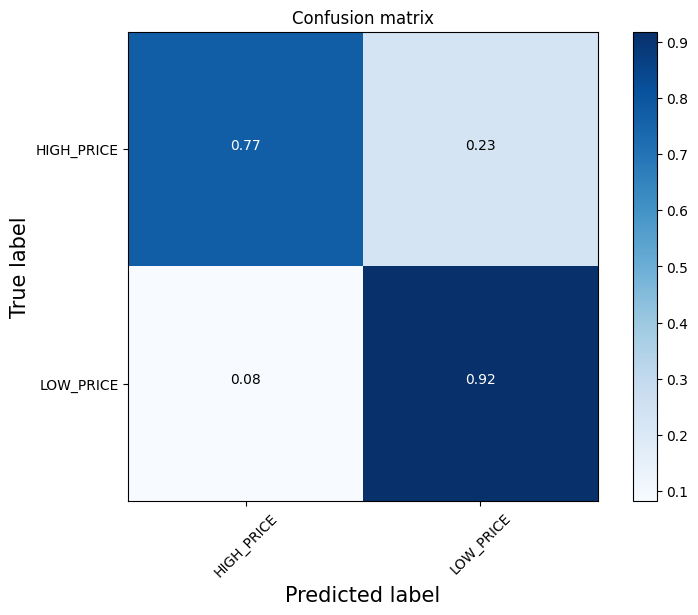

In [13]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


# Drop rows with NaN in y_test and corresponding rows in X_test_dtm
valid_indices = ~y_test.isna()
y_test_valid = y_test[valid_indices]
X_test_dtm_valid = X_test_dtm[valid_indices]

# Print accuracy:
print("Accuracy: ", accuracy_score(y_test_valid.astype(str), y_pred_class[valid_indices].astype(str)))

# print the confusion matrix
cnf_matrix = confusion_matrix(y_test_valid, y_pred_class[valid_indices]) # Use valid data
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix')


# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm_valid)[:, 1] # Use X_test_dtm_valid here
print("ROC_AOC_Score: ", roc_auc_score(y_test_valid, y_pred_prob)) # Use y_test_valid here

At this point, we can notice that the classifier is doing poorly. Our large feature vector could be creating a lot of noise in the form of very rarely occurring features that are not useful for learning. Let us change the count vectorizer to take a certain number of features as maximum.

CPU times: user 5.76 ms, sys: 0 ns, total: 5.76 ms
Wall time: 5.77 ms
Accuracy:  0.8473118279569892


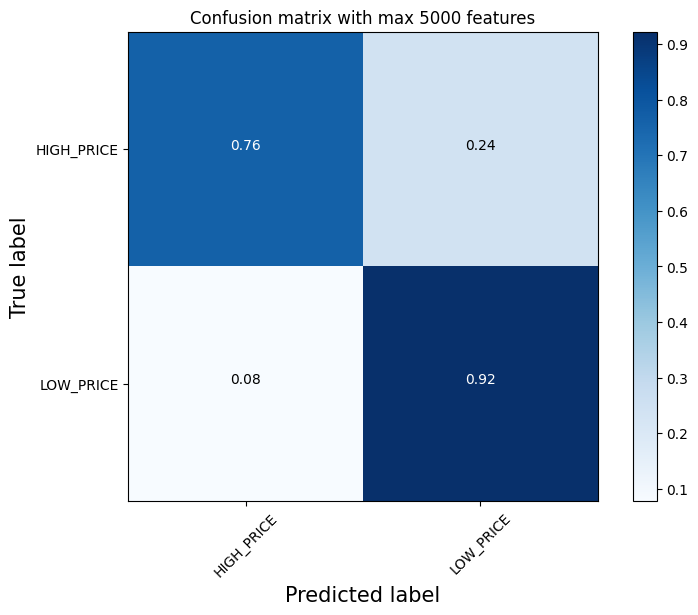

In [15]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
####%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
#y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

# changes from here
# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna() # Use Pandas .isna() method to find NaN values
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]
# changes unitl here...

####
# Drop rows with NaN in y_test and corresponding rows in X_test_dtm and y_pred_class
valid_indices = ~y_test.isna()
y_test_valid = y_test[valid_indices]
X_test_dtm_valid = X_test_dtm[valid_indices]
y_pred_class_valid = y_pred_class[valid_indices] # Subset y_pred_class as well


%time nb.fit(X_train_dtm_valid, y_train_valid) # train the model on data without NaN values (timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm



###print("Accuracy: ", metrics.accuracy_score(y_test_valid, y_pred_class_valid)) # Use valid data

print("Accuracy: ", metrics.accuracy_score(y_test_valid, y_pred_class_valid))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with max 5000 features')

Clearly, the performance on relevance classification got better even though the overall accuracy fell by 10%. Let us try another classification algorithm and see if the performance changes. For this experiment, we have considered logistic regression, with class_weight attribute as "balanced", to address the problem of class imbalance in this dataset.

Accuracy:  0.9139784946236559
AUC:  0.9317625231910946


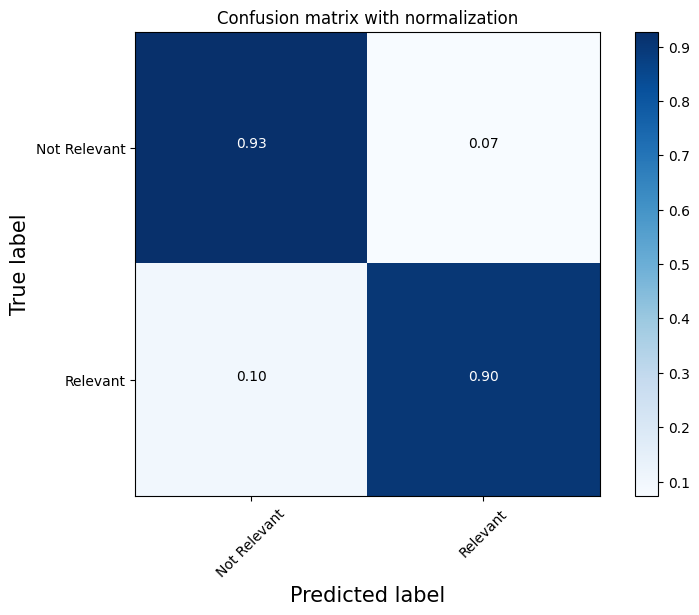

In [16]:
from sklearn.linear_model import LogisticRegression # import

# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna()
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm_valid, y_train_valid) # fit the model with training data without NaN values

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)


# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with normalization')

Let us wrap this notebook by trying with one more classifier, but reducing the feature vector size to 1000.

Accuracy:  0.8903225806451613
AUC:  0.9317625231910946


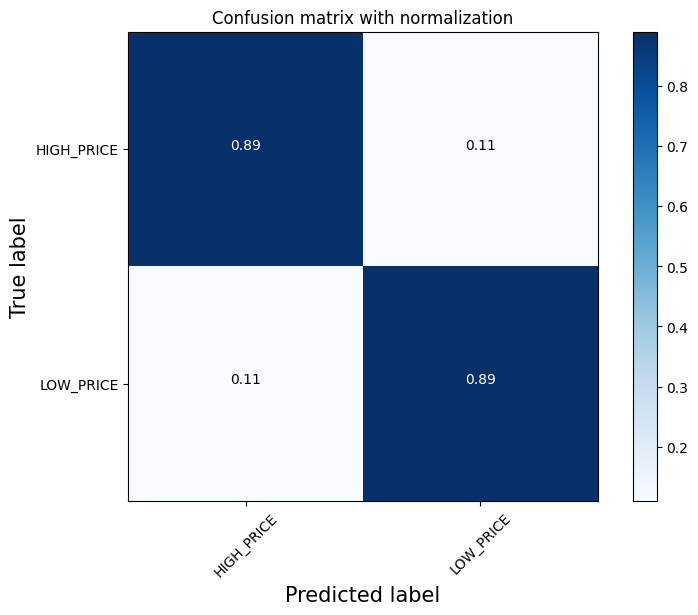

In [18]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=1000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with normalization')

So, how do we choose whats the best? If we look at overall accuracy alone, we should be choosing the very first classifier in this notebook. However, that is also doing poorly with identifying "relevant" articles. If we choose purely based on how good it is doing with "relevant" category, we should choose the second one we built. If we choose purely based on how good it is doing with "irrelevant" category, surely, nothing beats not building any classifier and just calling everything irrelevant! So, what to choose as the best among these depends on what we are looking for in our usecase!